# Exploratory data analysis of the Titanic dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid', palette=sns.husl_palette(s=1), context='talk')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.shape

(891, 12)

### Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

In [5]:
survived = train.groupby('Survived')['PassengerId'].count().rename(index={0:'Dead', 1:'Survived'})
survived

Survived
Dead        549
Survived    342
Name: PassengerId, dtype: int64

Text(0.5, 0, '')

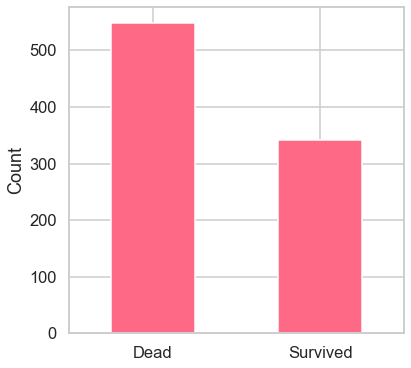

In [6]:
ax = survived.plot.bar(rot=0, figsize=(6,6))
ax.set_ylabel('Count')
ax.set_xlabel('')

### Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [7]:
firstclass = train[train['Pclass'] == 1]
firstclass.groupby('Survived')['PassengerId'].count()[1] / firstclass.shape[0]

0.6296296296296297

### Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [8]:
#train.groupby('Pclass')
passengers = train.groupby(['Pclass', 'Sex'])['PassengerId'].count()
passengers

Pclass  Sex   
1       female     94
        male      122
2       female     76
        male      108
3       female    144
        male      347
Name: PassengerId, dtype: int64

Text(0.5, 0, 'Passenger class')

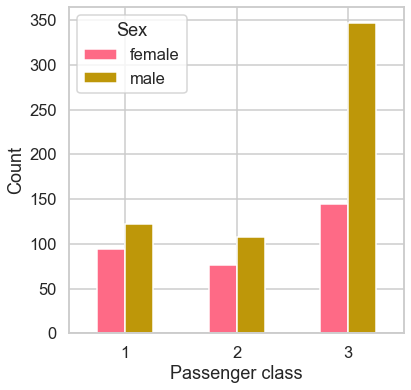

In [9]:
ax = passengers.unstack(1).plot.bar(rot=0, figsize=(6,6))

ax.set_ylabel('Count')
ax.set_xlabel('Passenger class')

### Much shorter version without grouping and stacking using seaborn.countplot()

Text(0.5, 0, 'Passenger class')

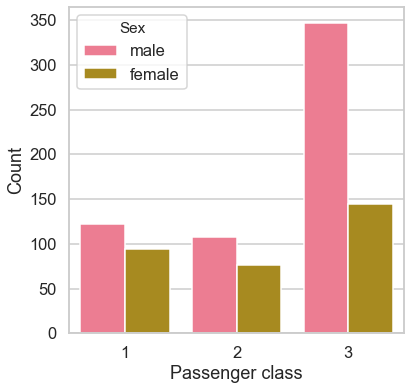

In [10]:
ax = plt.figure(figsize=(6,6))
ax = sns.countplot(x='Pclass', hue='Sex', data=train)

ax.set_ylabel('Count')
ax.set_xlabel('Passenger class')

### Add additional information with separation in two graphs
Uses FacetGrids


<Figure size 864x432 with 0 Axes>

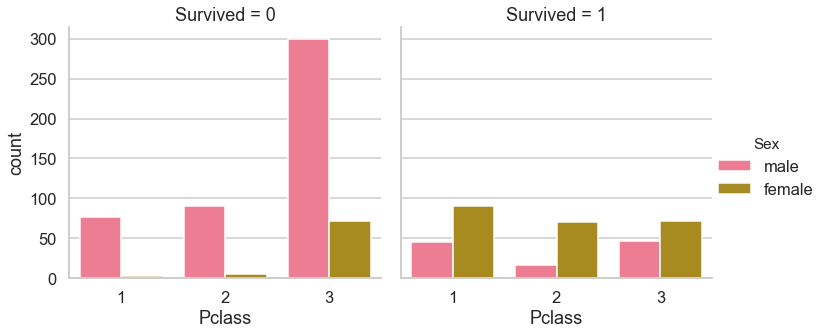

In [11]:
g = plt.figure(figsize=(12,6))
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",data=train, kind="count")

### Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

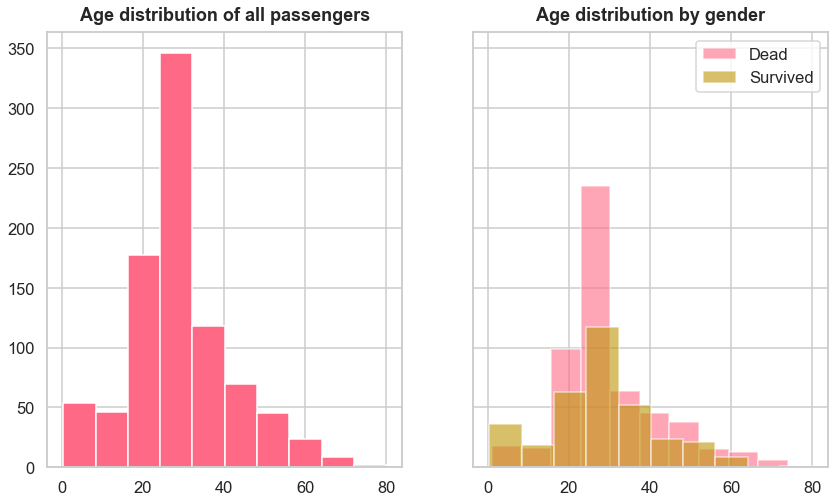

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(14,8))

ax = axs[0]
ax.hist(train['Age'])
ax.set_title('Age distribution of all passengers', weight='bold', pad=12)

ax = axs[1]
ax.hist(train[train['Survived'] == 0]['Age'], alpha=0.6, label='Dead')
ax.hist(train[train['Survived'] == 1]['Age'], alpha=0.6, label='Survived')
ax.set_title('Age distribution by gender', weight='bold', pad=12)
plt.legend()

#### Using seaborn.distplot()

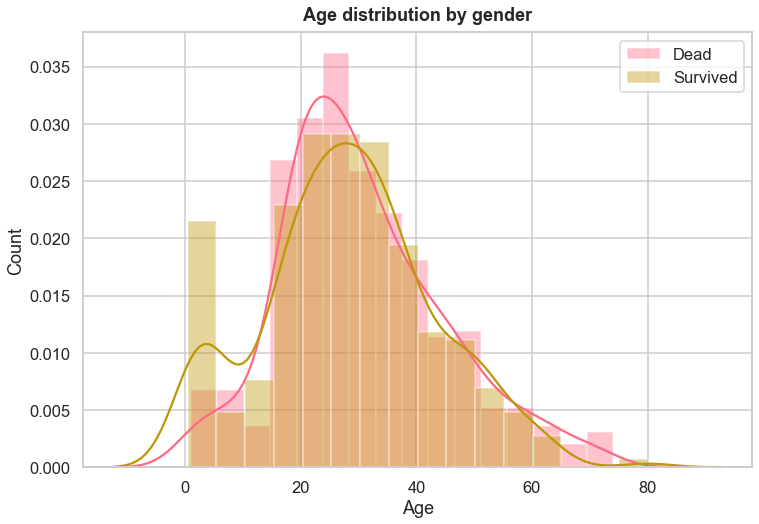

In [13]:
plt.figure(figsize=(12,8))

ax = sns.distplot(train[train['Survived'] == 0]['Age'], label="Dead")
sns.distplot(train[train['Survived'] == 1]['Age'], label="Survived")

ax.set_title('Age distribution by gender', weight='bold', pad=12)
ax.set_ylabel('Count')
plt.legend()


### Calculate the average age for survived and drowned passengers separately.

In [14]:
train.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### Replace missing age values by the mean age.

In [15]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S


### Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [16]:
passengers_count = train.groupby(['Survived', 'Sex', 'Pclass'])['PassengerId'].count()
passengers_count = passengers_count.unstack([0,1]).rename(columns={0:'dead', 1:'survived'})
passengers_count

Survived   dead      survived     
Sex      female male   female male
Pclass                            
1             3   77       91   45
2             6   91       70   17
3            72  300       72   47